In [1]:
pip install tensorflow numpy matplotlib


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target.reshape(-1, 1)  # Labels

# One-Hot Encode the target labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
import pandas as pd

In [18]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Create a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

# Save as CSV
df.to_csv('iris_dataset.csv', index=False)
print("Iris dataset saved as iris_dataset.csv")


Iris dataset saved as iris_dataset.csv


In [4]:
# Define the model architecture
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(4,)),  # Hidden Layer
    layers.Dense(3, activation='softmax')  # Output Layer
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=48,
                    batch_size=16)


Epoch 1/48
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6966 - loss: 0.6754 - val_accuracy: 0.7000 - val_loss: 0.6517
Epoch 2/48
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6453 - loss: 0.6884 - val_accuracy: 0.7000 - val_loss: 0.6419
Epoch 3/48
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6647 - loss: 0.6617 - val_accuracy: 0.7000 - val_loss: 0.6320
Epoch 4/48
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6677 - loss: 0.6521 - val_accuracy: 0.7000 - val_loss: 0.6220
Epoch 5/48
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6404 - loss: 0.6642 - val_accuracy: 0.7000 - val_loss: 0.6130
Epoch 6/48
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6259 - loss: 0.6555 - val_accuracy: 0.7000 - val_loss: 0.6040
Epoch 7/48
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6783 - loss: 0.6143 - val_accuracy: 0.7000 - val_loss: 0.5948
Epoch 8/48
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6651 - loss: 0.6264 - val_accuracy: 0.7333 - val_loss: 0.5864


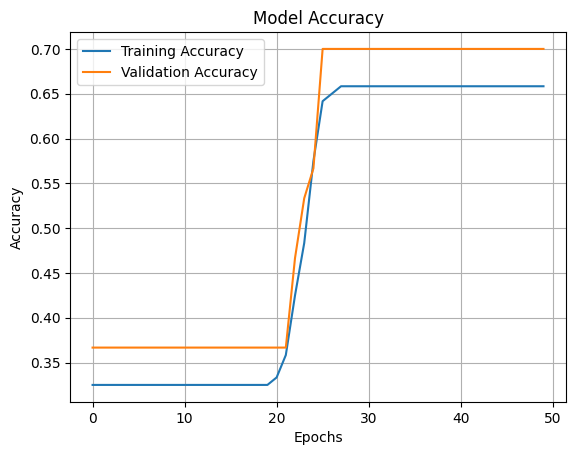

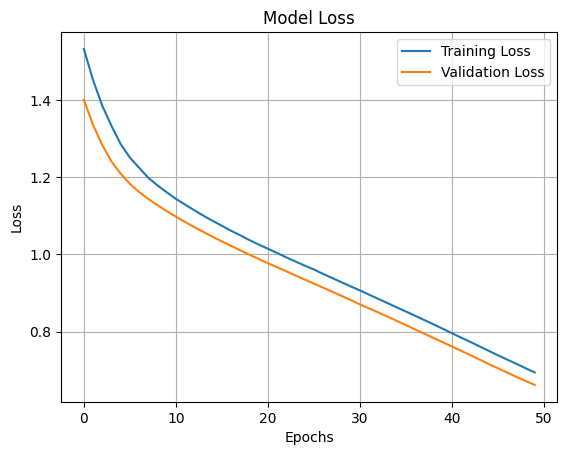

In [7]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



In [13]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(confusion_matrix(y_true_classes, y_pred_classes))
print(classification_report(y_true_classes, y_pred_classes))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [9]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [10]:
layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))


<Dense name=dense_2, built=False>

In [15]:
model.save('iris_model.h5')
